# Disclaimer

Source code has been adapted from https://gist.github.com/karpathy/a4166c7fe253700972fcbc77e4ea32c5

# Source 

In [56]:
""" Trains an agent with (stochastic) Policy Gradients on Pong. Uses OpenAI Gym. """
%matplotlib inline
import matplotlib
from IPython.display import display
import matplotlib.pyplot as plt

import numpy as np
#import cPickle as pickle
import _pickle as pickle
import gym
import logging, gzip, configparser

ImportError: No module named 'matplotlib.pyplot.colors'; 'matplotlib.pyplot' is not a package

## Visualize neuron activity

In [42]:
config = configparser.ConfigParser()
config.read('config.properties')
D = int(np.sqrt(int(config['NEURAL_NETWORK']['x']))) # input dimensionality: 80x80 grid
H = int(config['NEURAL_NETWORK']['number_neurons']) # number of hidden layer neurons

model = pickle.load(open('save_47000.p', 'rb'))

In [156]:
# plt.hist(neuron_activity);

array([ 0.004999  ,  0.00507154,  0.00504559, ...,  0.00309372,
        0.00327431,  0.00301695])

(array([  1.,   2.,  13.,  45.,  13.,   4.,   1.,   0.,   0.,   1.]),
 array([-0.00293454, -0.00211249, -0.00129045, -0.0004684 ,  0.00035364,
         0.00117569,  0.00199773,  0.00281978,  0.00364183,  0.00446387,
         0.00528592]),
 <a list of 10 Patch objects>)

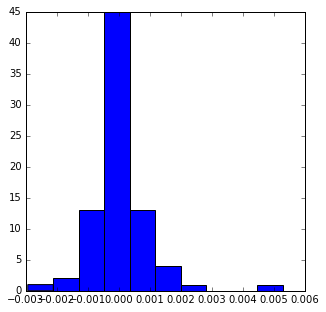

In [185]:
plt.hist(neuron_activity2d[:,70]);
#neuron_activity2d[10,0]

-0.00110116690548


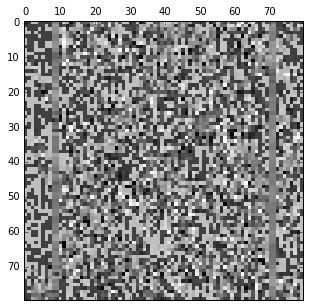

In [213]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
neuron = 70

neuron_activity = model["W1"][neuron]
neuron_weight = model["W2"][neuron]
neuron_activity2d = neuron_activity.reshape((D,D))
neuron_activity2d[neuron_activity2d>0]
plt.matshow(neuron_activity2d,cmap=plt.cm.gray,norm=matplotlib.colors.SymLogNorm(linthresh=0.01,
                                                                                               linscale=1000,
                                                                                 vmin=-1,vmax=1))
print(neuron_weight)

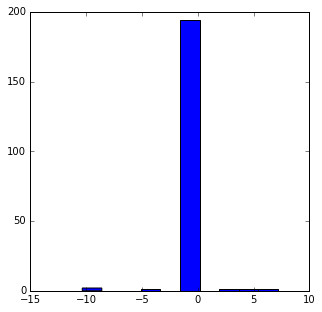

In [209]:
plt.hist(model["W2"]);

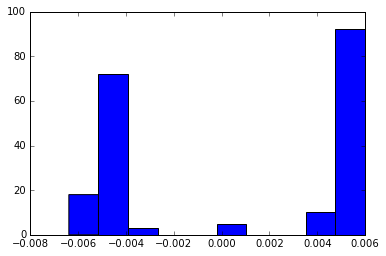

In [24]:
plt.hist(model["W1"][:,30]);

In [ ]:
#
env = gym.make("Pong-v0")
observation = env.reset()

# Have a look at the initial environment
plt.imshow(observation)
plt.show()

# Look at the available actions
env.get_action_meanings()
#
action_space = {'UP': 2, 'DOWN': 3}

'RIGHT' = 2 and 'LEFT' = 3 probably refer to 'UP' and 'DOWN' respectively